In [1]:
import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display

from minihack import LevelGenerator
from minihack import RewardManager

from utils import *
from algorithms import bfs, a_star

In [2]:
# Define a 12x12 room and populate it with
# different objects, monster and features
lvl_gen = LevelGenerator(w=12, h=12)

lvl_gen.add_monster(name="leprechaun",args=["awake"])
lvl_gen.add_monster(name="leprechaun",args=["awake"])
lvl_gen.add_gold(amount=10)
lvl_gen.add_gold(amount=20)
lvl_gen.add_gold(amount=30)
lvl_gen.add_gold(amount=40)
lvl_gen.add_gold(amount=50)

In [3]:
# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple or wielding a dagger
reward_manager.add_eat_event("apple")
reward_manager.add_wield_event("dagger")
# reward_manager
# -1 reward for standing on a sink
# but isn't required for terminating
# the episode
reward_manager.add_location_event("sink",reward=-1, terminal_required=False)

In [4]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file=lvl_gen.get_des(),
    # reward_manager=reward_manager,
    observation_keys=("chars", "pixel")
)

In [5]:
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a neutral human Caveman.              
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  ............                                  
                                  ............                                  
                                  .....l......                                  
                                  ..........$.                                  
                                  ............                                  
                                  ............                                  
                           

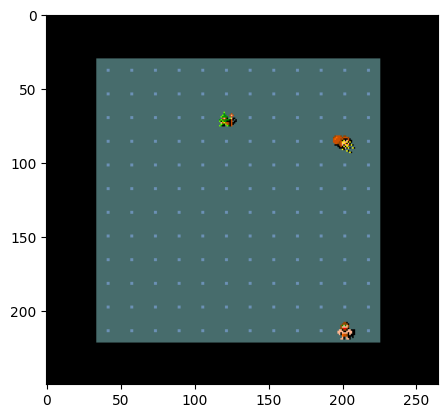

In [6]:
plt.imshow(state['pixel'][50:300, 510:775])

In [ ]:
plt.imshow(state['chars'][4:20, 30:50])

In [8]:
game_map = state['chars']
game = state['pixel']

In [9]:
# la prima coordinata è la y (dall'alto verso il basso) e parte da 1
# la seconda coordinata è la x (da sinistra verso destra) e parte da 1
start = get_player_location(game_map)
target = get_target_location(game_map,symbol = '$')
print("Agent position:", start)
print("Target position:", target)

Agent position: (16, 44)
Target position: (8, 44)


In [10]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 5.68 ms, sys: 8.65 ms, total: 14.3 ms
Wall time: 14.4 ms


In [ ]:
path

In [11]:
actions = actions_from_path(start, path[1:])

In [12]:
actions

[0, 0, 0, 0, 0, 0, 0, 0]

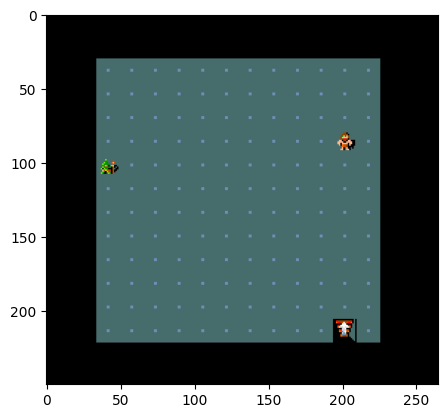

In [13]:
# env.step(action) fa muovere il personaggio.
# come parametro action è o un intero (0 -> up; 1 -> dx; 2 -> down; 3 -> sx) oppure una lista di interi
image = plt.imshow(game[50:300, 510:775])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][50:300, 510:775])